# Setup

### Find paths

In [11]:
repo_path = !git rev-parse --show-toplevel
assert (len(repo_path) == 1)

exec_path = "~/benchmark_fib.exe"

### Run benchmark function

In [12]:
import numpy as np
import json

def run(scheduler,domains=-1,spawners=-1):
    cmd = exec_path + " -scheduler " + scheduler + " -num-of-domains " + str(domains) + " -num-of-spawners " + str(spawners)
    print(cmd)
    output = !$cmd
    assert (output[0][0:5] == "start")
    assert (output[-1][0:4] == "done")
    output = output[1:-1]
    
    grouped_time = [] 
    grouped_minor_words = []
    grouped_major_words = [] 
    grouped_latency = []
    
    for i in range(1,round(len(output)/5)):
        index = i*5
        
        assert (output[index][:10] == "iteration:")
        #iteration = int(output[index][10:])
        
        assert (output[index+1][:5] == "time:")
        time = int(output[index+1][5:]) 
        grouped_time.append(time)
        
        assert (output[index+2][:12] == "minor_words:")
        minor_words = int(output[index+2][12:]) 
        grouped_minor_words.append(minor_words)
        
        assert (output[index+3][:12] == "major_words:")
        major_words = int(output[index+3][12:]) 
        grouped_major_words.append(major_words)
        
        assert (output[index+4][:8] == "latency:")
        latency = output[index+4][8:]
        grouped_latency.append(json.loads(latency))
        
        
        
    avg_time = np.mean(grouped_time)
    avg_minor_words = np.mean(grouped_minor_words)
    avg_major_words = np.mean(grouped_major_words)
    avg_latency = np.mean(grouped_latency,axis=0)
    
    return (avg_time, avg_minor_words, avg_major_words, avg_latency)

### Plotting

In [13]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

# Experiment: domains vs mixers

## Data collection

In [15]:
param_space = range(1,8)

fifo = []
for i in param_space:
    fifo.append(run("FIFO", domains=10*i, spawners=3*i))

lifo = []
for i in param_space:
    lifo.append(run("LIFO", domains=10*i, spawners=3*i))
    
x = list(param_space)

~/benchmark_fib.exe -scheduler FIFO -num-of-domains 10 -num-of-spawners 3
~/benchmark_fib.exe -scheduler FIFO -num-of-domains 20 -num-of-spawners 6
~/benchmark_fib.exe -scheduler FIFO -num-of-domains 30 -num-of-spawners 9
~/benchmark_fib.exe -scheduler FIFO -num-of-domains 40 -num-of-spawners 12
~/benchmark_fib.exe -scheduler FIFO -num-of-domains 50 -num-of-spawners 15
~/benchmark_fib.exe -scheduler FIFO -num-of-domains 60 -num-of-spawners 18
~/benchmark_fib.exe -scheduler FIFO -num-of-domains 70 -num-of-spawners 21
~/benchmark_fib.exe -scheduler LIFO -num-of-domains 10 -num-of-spawners 3
~/benchmark_fib.exe -scheduler LIFO -num-of-domains 20 -num-of-spawners 6
~/benchmark_fib.exe -scheduler LIFO -num-of-domains 30 -num-of-spawners 9
~/benchmark_fib.exe -scheduler LIFO -num-of-domains 40 -num-of-spawners 12
~/benchmark_fib.exe -scheduler LIFO -num-of-domains 50 -num-of-spawners 15
~/benchmark_fib.exe -scheduler LIFO -num-of-domains 60 -num-of-spawners 18
~/benchmark_fib.exe -scheduler 

In [22]:
fifo

[(349.0,
  119544009.0,
  47032429.1,
  array([0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
         0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
         3.000000e-01, 3.300000e+00, 1.590000e+01, 3.990000e+01,
         5.000000e+01, 1.205000e+02, 2.278000e+02, 4.412000e+02,
         1.082600e+03, 2.164300e+03, 3.772100e+03, 4.152900e+03,
         2.819600e+03, 6.096800e+03, 4.718370e+04, 1.205540e+05,
         2.750952e+05, 2.094788e+05, 5.505610e+04, 0.000000e+00,
         0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00])),
 (568.7,
  238684238.1,
  94266123.7,
  array([0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
         0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
         0.000000e+00, 4.200000e+00, 2.310000e+01, 7.630000e+01,
         8.800000e+01, 1.977000e+02, 3.870000e+02, 8.084000e+02,
         2.021400e+03, 4.244800e+03, 5.944300e+03, 1.063000e+04,
         6.590400e+03, 4.023500e+03, 3.148640e+04, 1.102291e+05,
         3.

In [16]:
lifo

[(69.7,
  125896946.2,
  2545288.5,
  array([0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
         0.000000e+00, 0.000000e+00, 0.000000e+00, 1.679200e+03,
         3.467262e+05, 8.972910e+04, 1.399977e+05, 7.190110e+04,
         3.587220e+04, 1.827840e+04, 1.203550e+04, 5.785900e+03,
         2.297100e+03, 2.143100e+03, 1.217400e+03, 3.843000e+02,
         1.700000e+02, 7.320000e+01, 3.700000e+01, 1.880000e+01,
         6.000000e+00, 2.800000e+00, 0.000000e+00, 0.000000e+00,
         0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00])),
 (100.8,
  252145440.8,
  5151946.7,
  array([0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
         0.000000e+00, 0.000000e+00, 0.000000e+00, 3.616300e+03,
         6.900998e+05, 1.807228e+05, 2.789038e+05, 1.363069e+05,
         6.921330e+04, 3.641010e+04, 2.490400e+04, 1.655450e+04,
         9.949100e+03, 3.393500e+03, 4.232200e+03, 1.524800e+03,
         5.084000e+02, 1.969000e+02, 1.010000e+02, 4.200000e+01,
         2.260

# Analysis

In [18]:
fifo_time = [v[0] for v in fifo]
lifo_time = [v[0] for v in lifo]

In [43]:
X = [10*v for v in x]

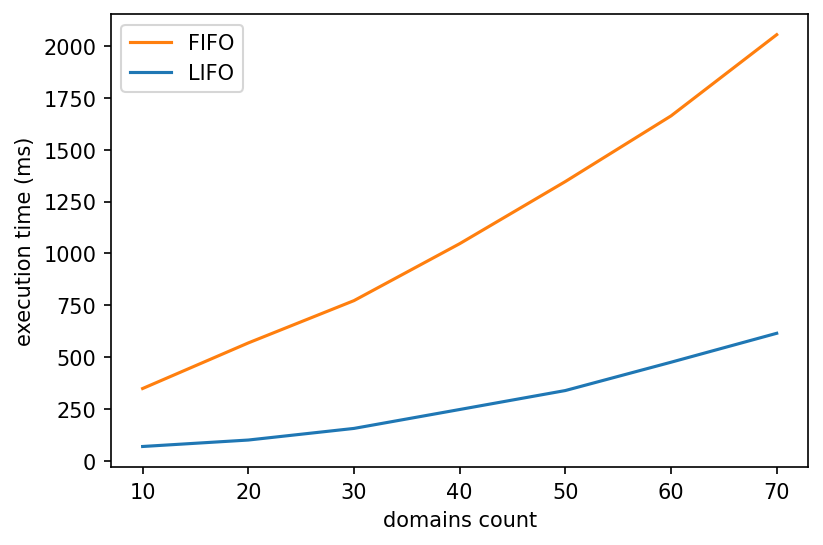

In [44]:
fig, ax = plt.subplots()
line_lifo, = ax.plot(X, lifo_time, label='LIFO')
line_fifo, = ax.plot(X, fifo_time, label='FIFO')
ax.legend(handles=[line_fifo, line_lifo])

plt.xlabel('domains count')
plt.ylabel('execution time (ms)')
plt.show()

# GC

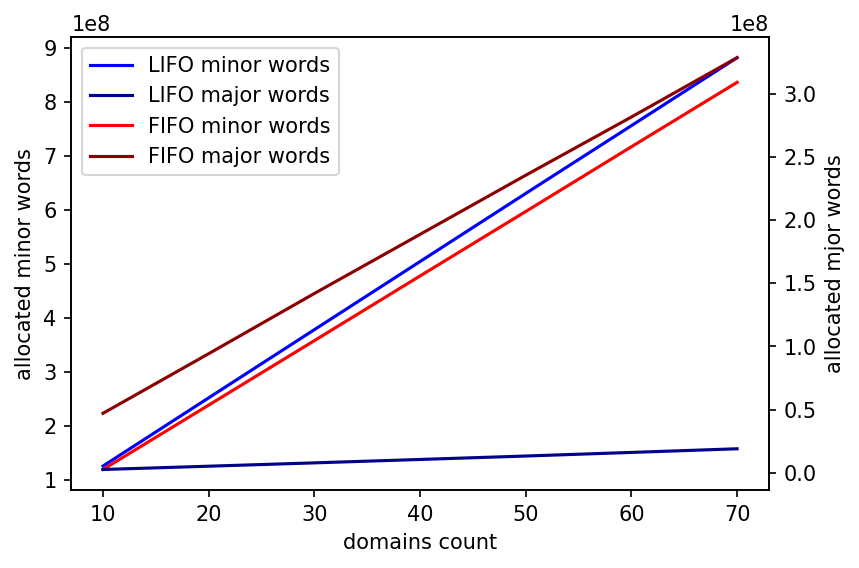

In [46]:
fifo_minor = [v[1] for v in fifo]
lifo_minor = [v[1] for v in lifo]

fifo_major = [v[2] for v in fifo]
lifo_major = [v[2] for v in lifo]

fig, ax = plt.subplots()
line_lifo, = ax.plot(X, lifo_minor, label='LIFO minor words', color='blue')
line_fifo, = ax.plot(X, fifo_minor, label='FIFO minor words', color='red')
plt.ylabel('allocated minor words')

plt.xlabel('domains count')

ax2 = ax.twinx()
line_lifo2, = ax2.plot(X, lifo_major, label='LIFO major words', color='darkblue')
line_fifo2, = ax2.plot(X, fifo_major, label='FIFO major words', color='darkred')

ax.legend(handles=[line_lifo, line_lifo2,line_fifo, line_fifo2])
plt.ylabel('allocated mjor words')

plt.show()

# Latency

In [24]:
fifo_latency = [v[3] for v in fifo]
lifo_latency = [v[3] for v in lifo]

In [31]:
fifo_sum_lat = np.sum(fifo_latency,axis=0)
lifo_sum_lat = np.sum(lifo_latency,axis=0)

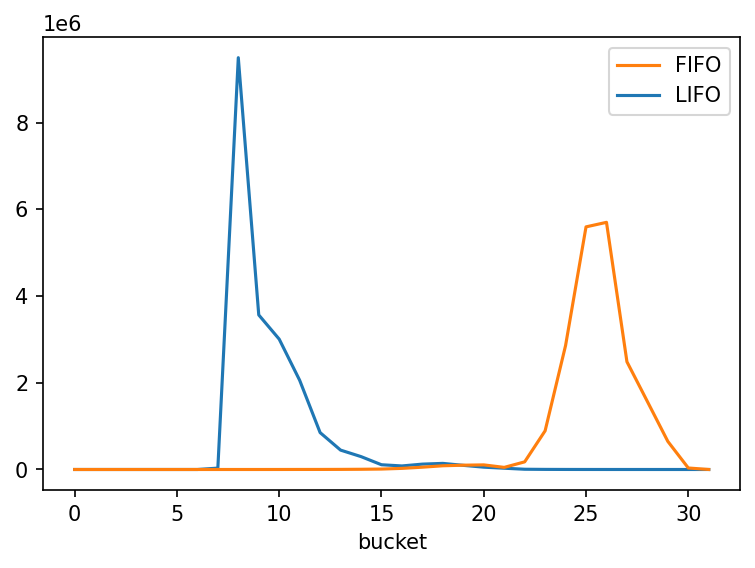

In [32]:
fig, ax = plt.subplots()
line_lifo, = ax.plot(lifo_sum_lat, label='LIFO')
line_fifo, = ax.plot(fifo_sum_lat, label='FIFO')
ax.legend(handles=[line_fifo, line_lifo])

plt.xlabel('bucket')
plt.ylabel('')
plt.show()

# Detailed

In [34]:
len(fifo_latency)

7

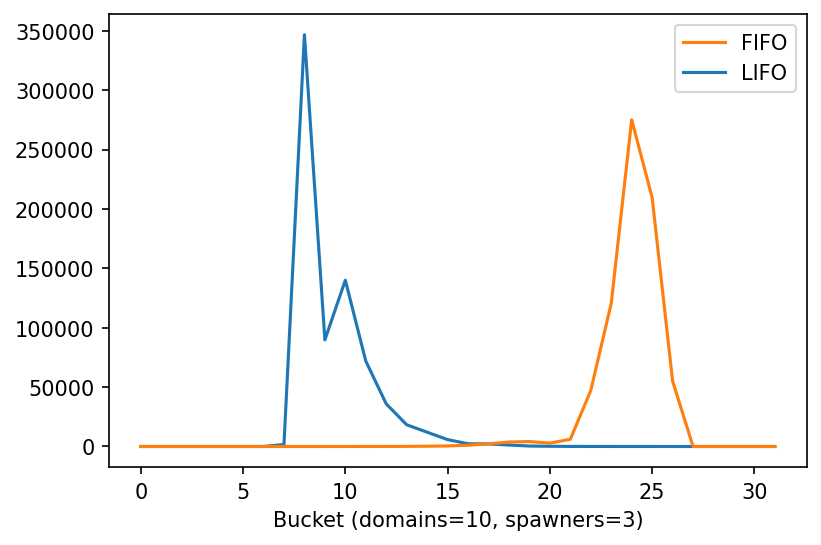

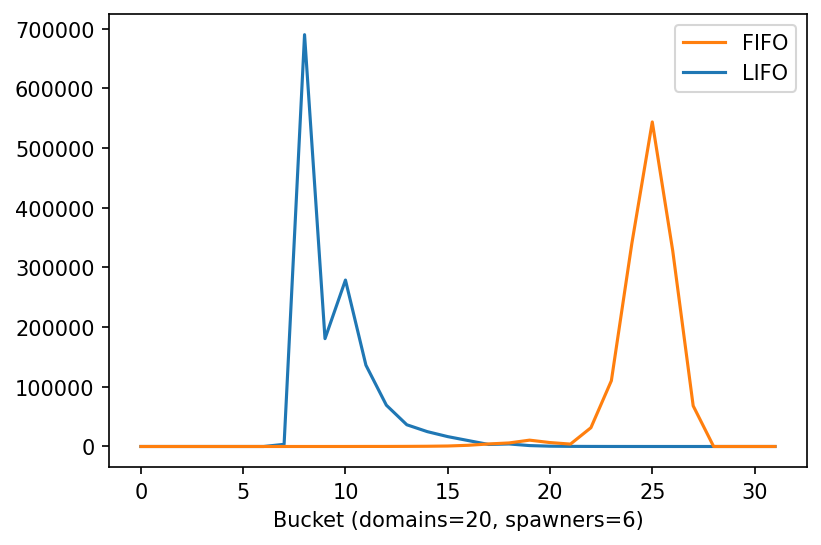

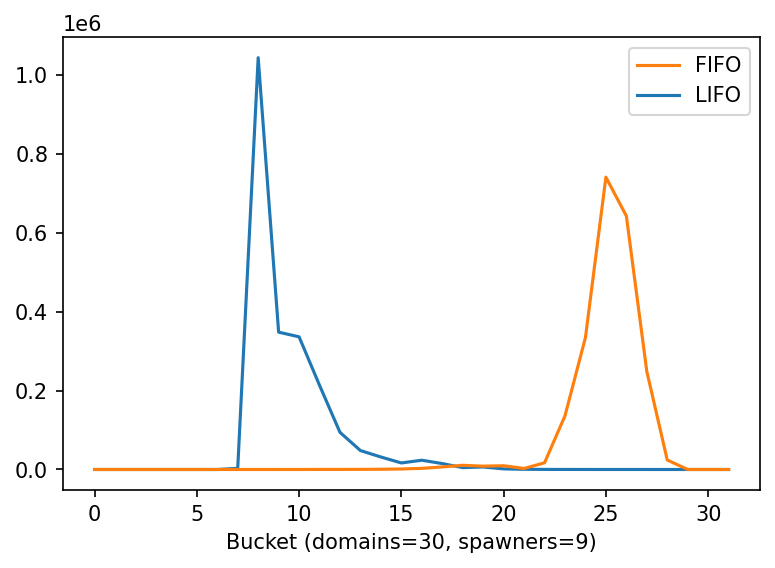

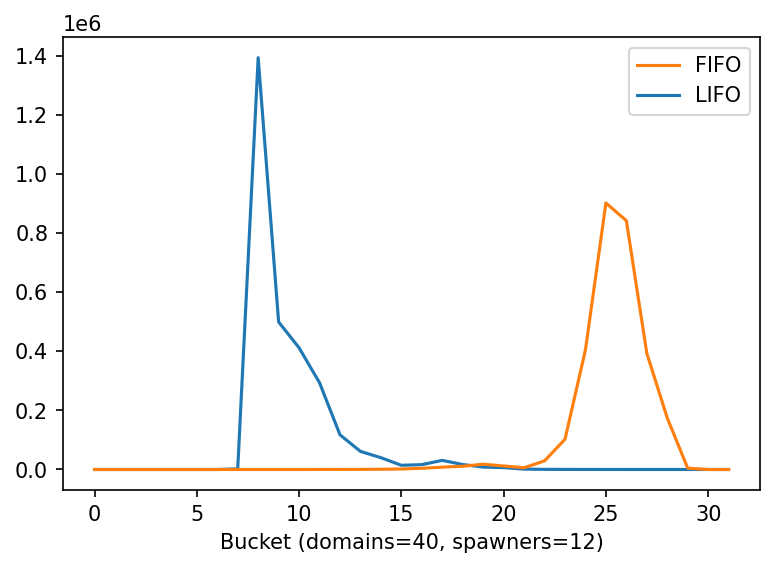

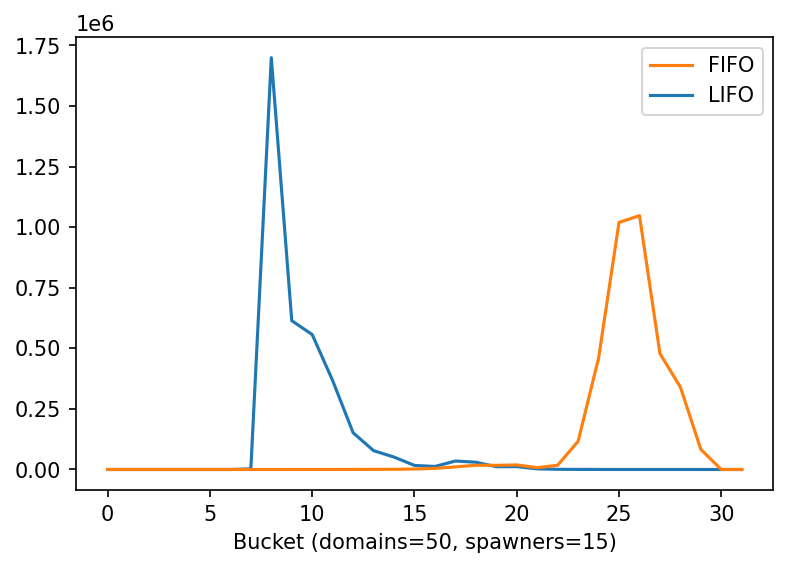

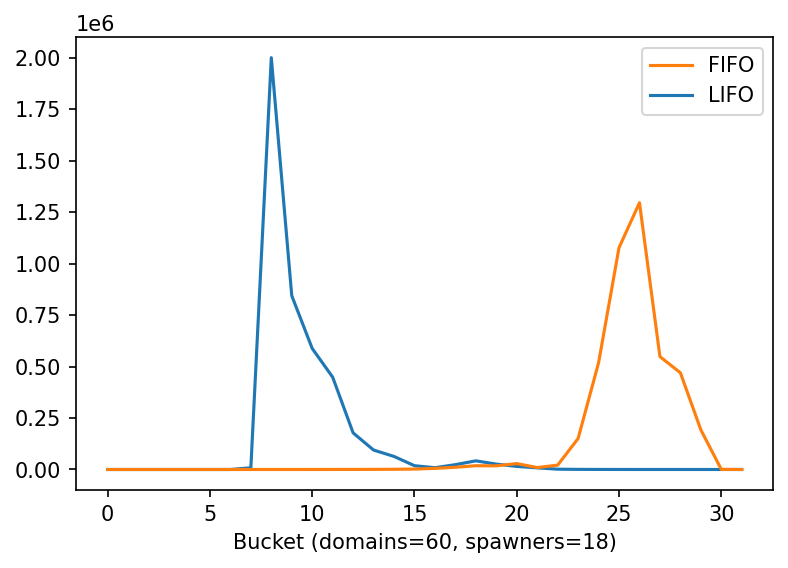

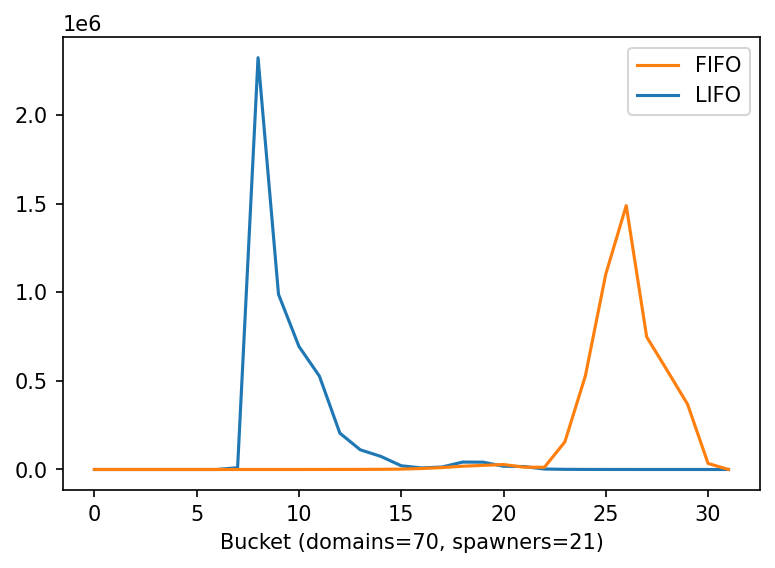

In [45]:
for i in range(0,7):
    fig, ax = plt.subplots()
    line_lifo, = ax.plot(lifo_latency[i], label='LIFO')
    line_fifo, = ax.plot(fifo_latency[i], label='FIFO')
    ax.legend(handles=[line_fifo, line_lifo])

    plt.xlabel('Bucket (domains=' + str((i+1)*10) + ', spawners=' +str((i+1)*3) +')')
    plt.show()